# Ransac sift homography
0.	选择两幅部分内容一致，部分内容不同的图像，两者可以有角度/位移等变化。【这个变化完全可以由第一周的内容自己做出来】
1.	对两幅图像分别进行关键点检测，比如用 SIFT. 【大家完全可以尝试别的关键点】
2.	对两幅图像的关键点进行进行匹配并用 RANSAC 去噪，找到单应性关系
3.	将第二幅图像按照单应性关系进行变换 【即右乘单应性矩阵】
4.	将两幅图像相互对应的点重合，其余点也即进行融合。因旋转造成图像 size 大小不同等， 补 0 即可。


## SIFT: Scale-Invariant Feature Transform
02--02：40：00

1. GenerateScale-space:DoG 生成尺度空间
2. Scale-spaceExtremaDetection 尺度空间极值点检测
3. AccurateKeypointLocalization 精确定位极值点位置
4. Eliminating Edge Responses 消除边缘效应，阈值判断
5. Orientation Assignment 方向指定
6. Keypoint Descriptor 特征描述


### 1. GenerateScale-space:DoG 生成尺度空间

DoG: Difference of Gaussian

GP: Gaussian Pyramid 高斯金字塔
octave，缩小1/2生成octave：偶数行、偶数列丢弃

差分，生成高斯差分金字塔，-1

### 2. Scale-spaceExtremaDetection 尺度空间极值点检测

局部极值点：上中下，和9+8+9=27个点比较，确定极值，-2

总n+3张图片

### 3. AccurateKeypointLocalization 精确定位极值点位置

泰勒展开

### 4. Eliminating Edge Responses 消除边缘效应，阈值判断

### 5. Orientation Assignment 方向指定

直方图统计：
360/10=36度 为一个bin

梯度大小投票
高斯加权：越往中心，权重越大

最大为主方向，第二大达80%为辅方向

### 6. Keypoint Descriptor 特征描述

旋转不变性

更大范围内统计：4x4个子区域，8个方向，4x4x8=128维向量

主方向旋转到x轴方向

归一化处理


In [1]:
import numpy as np
import argparse
import cv2
import matplotlib.pyplot as plt


In [2]:
print(cv2.__version__)

3.4.2


In [3]:
img1 = cv2.imread('IMG_1336.jpg')
img2 = cv2.imread('IMG_1337.jpg')
img3 = cv2.imread('IMG_1338.jpg')

In [4]:
def my_show(img):
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

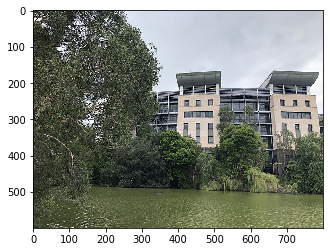

In [5]:
my_show(img1)

In [12]:
sift = cv2.xfeatures2d.SIFT_create()

In [13]:
def key_points(img, sift):
    kp = sift.detect(img)
    kp, des = sift.compute(img, kp)
    return kp, des


In [14]:
kp1, des1 = key_points(img1, sift)
print(des1.shape)

(3104, 128)


In [10]:
def show_key_points(img, kp):
    img_sift = cv2.drawKeypoints(img, kp, outImage=np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(10,10),dpi=100)
    my_show(img_sift)

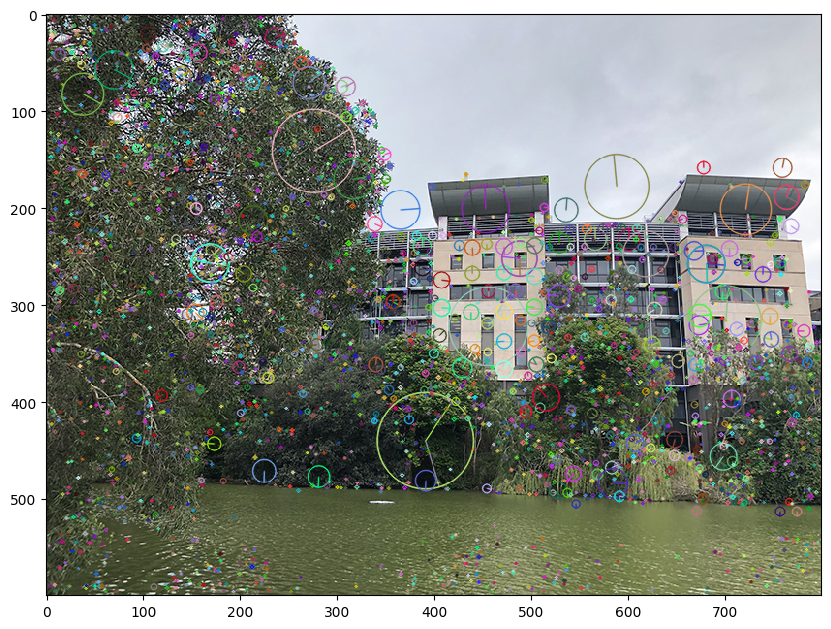

In [11]:
show_key_points(img1, kp1)

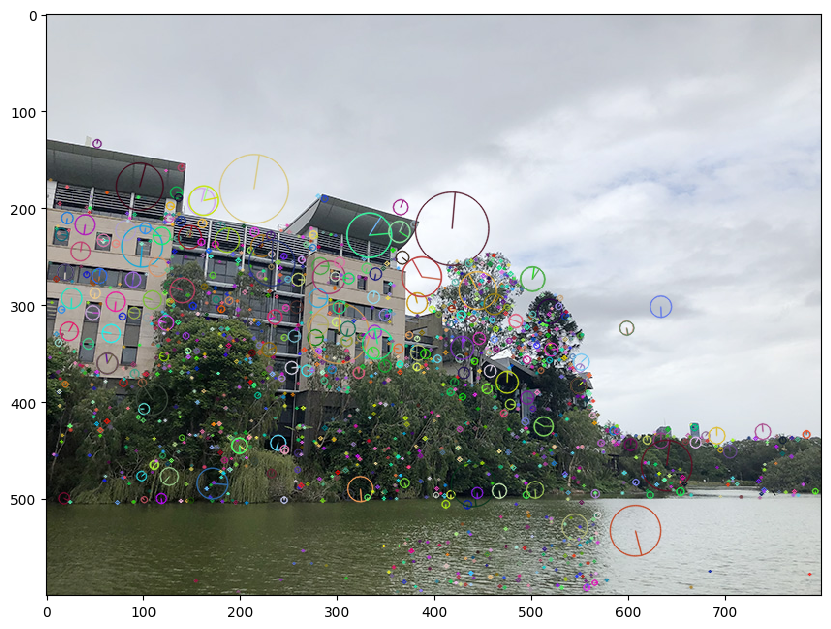

In [15]:
kp2, des2 = key_points(img2, sift)
show_key_points(img2,kp2)


In [21]:
def show_key_points(img, kp):
    img_sift = cv2.drawKeypoints(img, kp, outImage=np.array([]),flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.figure(figsize=(10,10),dpi=100)
    my_show(img_sift)

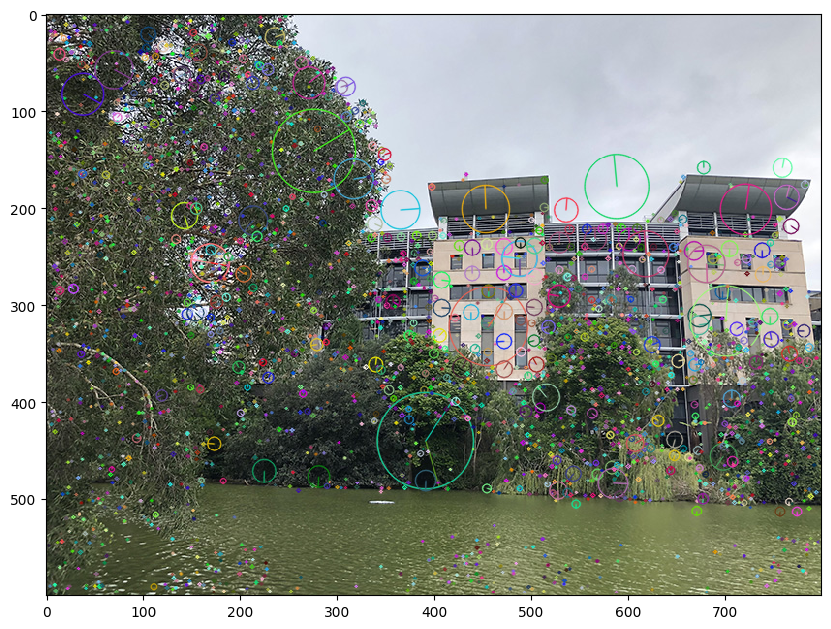

In [22]:
show_key_points(img1, kp1)

In [ ]:
stitcher = cv2.createStitcher()

In [ ]:
images = []
images.append(img1)
images.append(img2)
images.append(img3)
